### Histogram, PDF

Histograms are useful because they make the most frequent values immedi- ately apparent. But they are not the best choice for comparing two distributions. In this example, there are fewer “first babies” than “others,” so some of the apparent differences in the histograms are due to sample sizes. In the next chapter we address this problem using probability mass functions.     
A histogram is a complete description of the distribution of a sample; that is, given a histogram, we could reconstruct the values in the sample (although not their order).     
If the details of the distribution are important, it might be necessary to present a histogram. But often we want to summarize the distribution with a few descriptive statistics.
Some of the characteristics we might want to report are:
 - central tendency: Do the values tend to cluster around a particular point?
 - modes: Is there more than one cluster?
 - spread: How much variability is there in the values?
 - tails: How quickly do the probabilities drop off as we move away from the modes?
 - outliers: Are there extreme values far from the modes?

Another way to represent a distribution is a probability mass function (PMF), which maps from each value to its probability. A probability is a frequency expressed as a fraction of the sample size, n. To get from frequen- cies to probabilities, we divide through by n, which is called normalization.


Pmf and Hist objects are similar in many ways; in fact, they inherit many of their methods from a common parent class. For example, the methods Values and Items work the same way for both. The biggest difference is that a Hist maps from values to integer counters; a Pmf maps from values to floating-point probabilities.

Histograms and PMFs are useful while you are exploring data and trying to identify patterns and relationships. Once you have an idea what is going on, a good next step is to design a visualization that makes the patterns you have identified as clear as possible.

It is also good move to visualize difference in pmf values as bar plot from negative to positive plain.

In [2]:
import site
site.addsitedir('./code')

from __future__ import print_function, division
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nsfg
import first
import thinkstats2
import thinkplot

resp = nsfg.ReadFemResp(dct_file='./code/2002FemResp.dct',
                dat_file='./code/2002FemResp.dat.gz')

(array([3563.,    0., 1636.,    0., 1500.,    0.,  666.,    0.,  196.,
          82.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

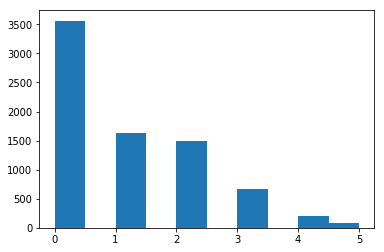

In [3]:
under_18 = resp[resp.numkdhh < 18]
above_18 = resp[resp.numkdhh <10]
plt.hist(data=under_18, x='numkdhh')

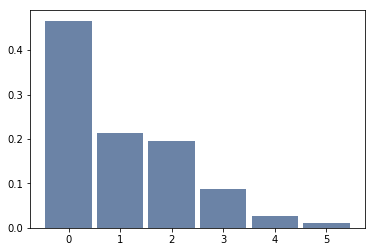

In [4]:
actual = thinkstats2.Pmf(under_18.numkdhh)
thinkplot.Hist(actual)

In [5]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
    new_pmf.Normalize()
    return new_pmf

2.403679100664282
1.024205155043831


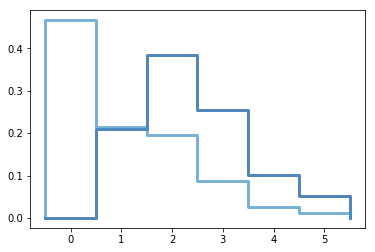

In [6]:
biased = BiasPmf(actual, label='biased')
thinkplot.PrePlot(2)
thinkplot.Pmfs([biased, actual])
print(biased.Mean())
print(actual.Mean())

If you are given a PMF, you can still compute the mean, but the process is slightly different:    
$x ̄ =   \sum (p_i x_i)$

where the xi are the unique values in the PMF and pi = PMF(xi). Similarly, you can compute variance like this:    
$ S^2 =  \sum (p_i ( x_i − x ̄ )^2)$

In [7]:
def mean_pmf(pmf):
    res = 0
    for k in pmf:
        res+=k * pmf[k]
    return res

def variance_pmf(pmf):
    res=0
    mean = mean_pmf(pmf)
    for k in pmf:
        res+=k * (pmf[k] - mean) **2
    return res
    

In [8]:
mean_pmf(actual) ,variance_pmf(actual)

(1.024205155043831, 13.785788755984738)

### Cumulative distribution functions, CDF


PMFs work well if the number of values is small. But as the number of values increases, the probability associated with each value gets smaller and the effect of random noise increases.

In [9]:
def percentile_rank(scores, your_score):
    rnk = 0
    for s in scores:
        if your_score >= s:
            rnk+=1
    rank = 100 * rnk/len(scores)
    return rank

def percentile(scores, rank):
    scores.sort()
    ind = rank * (len(scores)-1) // 100
    return scores[ind]

In [10]:
percentile_rank([1,2,3,4,5,6,7,8,9,10], 5), percentile([1,2,3,4,5,6,7,8,9,10], 50)

(50.0, 5)

The CDF is the function that maps from a value to its percentile rank.

In [11]:
def evalCDF(sample, x):
    count=0.0
    for i in sample:
        if x >= i:
            count+=1
    return count / len(sample)

This function is almost identical to PercentileRank, except that the result is a probability in the range 0–1 rather than a percentile rank in the range 0–100.
As an example, suppose we collect a sample with the values [1, 2, 2, 3, 5]. Here are some values from its CDF:
CDF(0) = 0
CDF(1) = 0.2 CDF(2) = 0.6 CDF(3) = 0.8 CDF(4) = 0.8 CDF(5) = 1

In [12]:
evalCDF([3,5,3,2,1], 4)

0.8

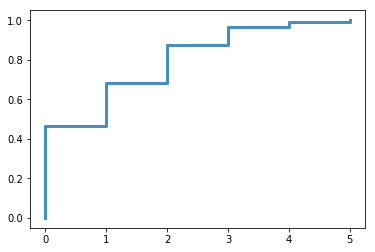

In [13]:
cdf1 = thinkstats2.Cdf(under_18.numkdhh, label='first')
cdf2 = thinkstats2.Cdf(above_18.numkdhh, label='other')
thinkplot.PrePlot(2)
thinkplot.Cdfs([cdf1, cdf2])

{'xscale': 'linear', 'yscale': 'linear'}

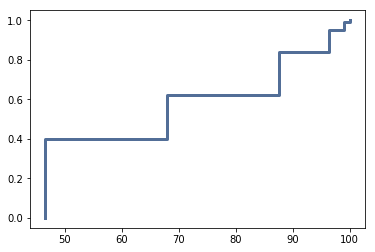

In [17]:
random_u18 = np.random.choice(under_18.numkdhh, 100, replace=True)
ranks = [cdf1.PercentileRank(r) for r in random_u18]
cdf_rank = thinkstats2.Cdf(ranks)
thinkplot.Cdf(cdf_rank)

#### Comparing percentile ranks
Percentile ranks are useful for comparing measurements across different groups. For example, people who compete in foot races are usually grouped by age and gender. To compare people in different age groups, you can convert race times to percentile ranks.
A few years ago I ran the James Joyce Ramble 10K in Dedham MA; I finished in 42:44, which was 97th in a field of 1633. I beat or tied 1537 runners out of 1633, so my percentile rank in the field is 94%.
In my age group, denoted M4049 for “male between 40 and 49 years of age”, I came in 26th out of 256. So my percentile rank in my age group was 90%.
If I am still running in 10 years (and I hope I am), I will be in the M5059 division. Assuming that my percentile rank in my division is the same, how much slower should I expect to be?
I can answer that question by converting my percentile rank in M4049 to a position in M5059. Here’s the code:

def PercentileToPosition(percentile, field_size):
    beat = percentile * field_size / 100.0
    position = field_size - beat + 1
    return position
 
There were 171 people in M5059, so I would have to come in between 17th and 18th place to have the same percentile rank. The finishing time of the 17th runner in M5059 was 46:05, so that’s the time I will have to beat to maintain my percentile rank.


Glossary
-  percentile rank: The percentage of values in a distribution that are less than or equal to a given value.
-  percentile: The value associated with a given percentile rank.
-  cumulative distribution function (CDF): A function that maps from values to their cumulative probabilities. CDF(x) is the fraction of the sample less than or equal to x.
-  inverse CDF: A function that maps from a cumulative probability, p, to the corresponding value.
 
- median: The 50th percentile, often used as a measure of central ten- dency.
- interquartile range: The difference between the 75th and 25th per- centiles, used as a measure of spread.
- quantile: A sequence of values that correspond to equally spaced per- centile ranks; for example, the quartiles of a distribution are the 25th, 50th and 75th percentiles.
- replacement: A property of a sampling process. “With replacement” means that the same value can be chosen more than once; “without replacement” means that once a value is chosen, it is removed from the population.

(array([ 88., 115., 100.,  99.,  94., 106.,  88., 110., 102.,  98.]),
 array([7.68515507e-04, 1.00616757e-01, 2.00464998e-01, 3.00313239e-01,
        4.00161480e-01, 5.00009722e-01, 5.99857963e-01, 6.99706204e-01,
        7.99554445e-01, 8.99402686e-01, 9.99250928e-01]),
 <a list of 10 Patch objects>)

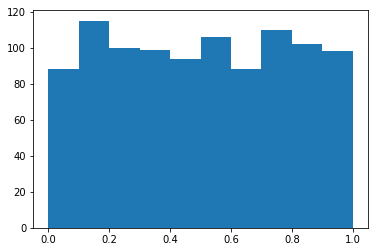

In [23]:
t = np.random.random(1000)
plt.hist(t)

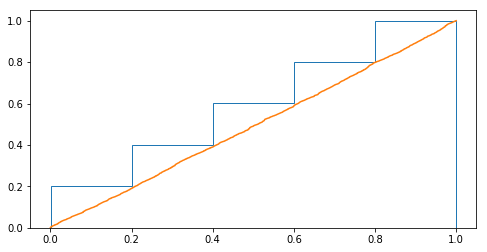

In [105]:
fix, ax = plt.subplots(figsize=(8,4))
ax.hist(t, 5, normed=1, histtype='step', cumulative=True)
nor_t = (t_sum - np.min(t_sum))/np.ptp(t_sum)
x = list(range(0, 1000))
nor_t2 = (x - np.min(x))/np.ptp(x)
ax.plot(nor_t, nor_t2)

Straight line = uniform distribution.

**CDF** ( Cumulative Distribution Function)

As the name cumulative suggests, this is simply the probability upto a particular value of the random variable, say x. Generally denoted by F, F= P (X<=x) for any value of x in the X space. It is defined for both discrete and continuous random variables.

**PDF** ( probability density function)
This basically is a probability law for a continuous random variable say X ( for discrete, it is probability mass function).

**PMF** 
Probability law for a discrete random variable.